In [16]:
import pandas as pd
import json
import ast

In [26]:
credits = pd.read_csv('datasets/credits.csv')
keywords = pd.read_csv('datasets/keywords.csv')
links_small = pd.read_csv('datasets/links_small.csv')
links = pd.read_csv('datasets/links.csv')
movies_metadata = pd.read_csv('datasets/movies_metadata.csv')
ratings_small = pd.read_csv('datasets/ratings_small.csv')
ratings = pd.read_csv('datasets/ratings.csv')

C:\Users\masha\AppData\Local\Temp\ipykernel_14912\90659408.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('datasets/movies_metadata.csv')


In [84]:
movies_metadata

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie,labels
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,0,0,1,0,0,0,0,0,0,0
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,0,1,0,0,0,0,0,0,0,0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,0,0,0,0,0,0,0,0,0,0
3,False,NaN,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,0,0,0,0,0,0,0,0,0,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,0,0,0,0,0,0,0,0,0,2
45462,False,NaN,0,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,0,0,0,0,0,0,0,0,0,1
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,0,0,0,0,0,0,0,0,0,2
45464,False,NaN,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,0,0,0,0,0,0,0,0,0,3


In [42]:
features = ['popularity', 'runtime', 'vote_average']

In [28]:
movies_metadata['genres_p'] = movies_metadata['genres'].apply(ast.literal_eval)

In [33]:
genres = (
    movies_metadata['genres_p']
    .explode()
    .dropna()
    .apply(lambda x: x.get('name'))
    .dropna()
    .value_counts()
)

genres

genres_p
Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions                         1
Visi

In [34]:
target_genres = genres[genres > 1].index.tolist()

In [35]:
target_genres

['Drama',
 'Comedy',
 'Thriller',
 'Romance',
 'Action',
 'Horror',
 'Crime',
 'Documentary',
 'Adventure',
 'Science Fiction',
 'Family',
 'Mystery',
 'Fantasy',
 'Animation',
 'Foreign',
 'Music',
 'History',
 'War',
 'Western',
 'TV Movie']

In [36]:
genres_sets = movies_metadata['genres_p'].apply(
    lambda x: {d.get('name') for d in x if isinstance(d, dict) and d.get('name')}
)

In [37]:
for g in target_genres:
    movies_metadata[g] = genres_sets.apply(lambda x: int(g in x))

In [39]:
movies_metadata = movies_metadata.drop(columns=['genres', 'genres_p'])

In [41]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   homepage               7782 non-null   object 
 4   id                     45466 non-null  object 
 5   imdb_id                45449 non-null  object 
 6   original_language      45455 non-null  object 
 7   original_title         45466 non-null  object 
 8   overview               44512 non-null  object 
 9   popularity             45461 non-null  object 
 10  poster_path            45080 non-null  object 
 11  production_companies   45463 non-null  object 
 12  production_countries   45463 non-null  object 
 13  release_date           45379 non-null  object 
 14  revenue                45460 non-null  float64
 15  ru

In [56]:
X = pd.concat([movies_metadata[features], movies_metadata[target_genres]], axis=1)
X = X.dropna()
X['popularity'] = X['popularity'].astype(float)
X

,popularity,runtime,vote_average,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,...,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,21.946943,81.0,7.7,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,17.015539,104.0,6.9,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,11.712900,101.0,6.5,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.859495,127.0,6.1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.387519,106.0,5.7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0.072051,90.0,4.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
45462,0.178241,360.0,9.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,0.903007,90.0,3.8,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,0.003503,87.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


_____
_____

In [61]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [70]:
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])
X

,popularity,runtime,vote_average,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,...,Family,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie
0,3.158419,-0.341814,1.084732,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,2.339095,0.257029,0.665640,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,1.458093,0.178919,0.456094,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.153296,0.855872,0.246548,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.905600,0.309102,0.037002,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,-0.475966,-0.107485,-0.853569,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
45462,-0.458323,6.922413,1.765757,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,-0.337907,-0.107485,-0.958342,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,-0.487355,-0.185594,-2.949030,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

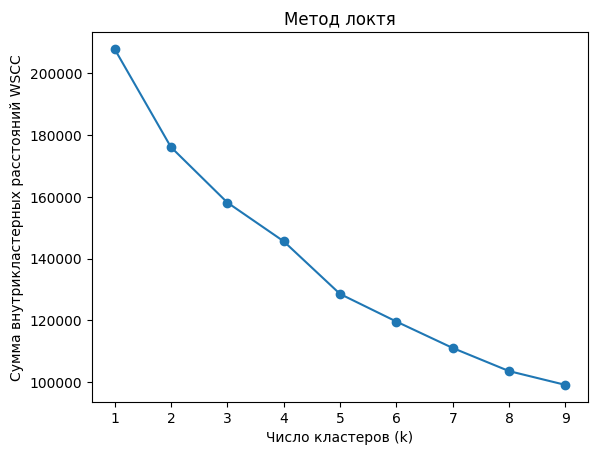

In [65]:
K_range = range(1, 10)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний WSCC")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [72]:
kmeans_pred = kmeans.predict(X_pca)

In [73]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [77]:
labels

array([0, 0, 0, ..., 2, 3, 3], shape=(45203,), dtype=int32)

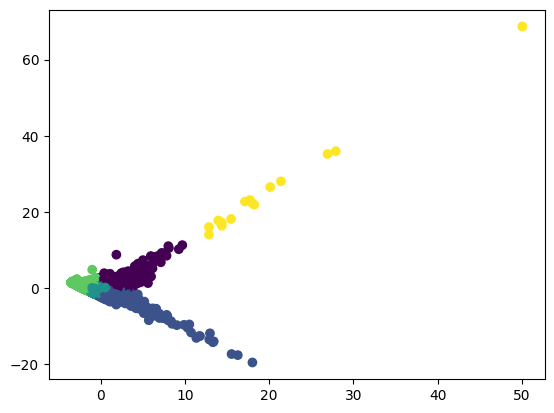

In [75]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')

In [81]:
movies_metadata = movies_metadata.dropna(subset=features)

In [83]:
movies_metadata['labels'] = labels

C:\Users\masha\AppData\Local\Temp\ipykernel_14912\1285363612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata['labels'] = labels


In [98]:
cluster_id = 0
point_index = 288

In [99]:
cluster_points = X_pca[movies_metadata['labels'] == cluster_id]
cluster_indices = movies_metadata[movies_metadata['labels'] == cluster_id].index

In [89]:
from sklearn.metrics import pairwise_distances

In [100]:
point = X_pca[point_index].reshape(1, -1)

distances = pairwise_distances(point, cluster_points)[0]

In [101]:
nearest = (
    pd.DataFrame({
        "index": cluster_indices,
        "distance": distances
    })
    .sort_values("distance")
)

In [102]:
nearest

,index,distance
124,288,0.000000
6880,44960,0.022396
1318,3076,0.032395
2474,6870,0.034588
5167,20988,0.035035
...,...,...
5620,24121,10.045136
6253,33361,11.539740
6791,43286,11.932799
4657,17818,11.980822


In [103]:
movies_metadata.loc[nearest["index"]]

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,Mystery,Fantasy,Animation,Foreign,Music,History,War,Western,TV Movie,labels
288,False,NaN,50000000,NaN,6950,tt0114069,en,Outbreak,A deadly airborne virus finds its way into the...,13.676444,...,0,0,0,0,0,0,0,0,0,0
44960,False,NaN,0,NaN,398924,tt5091612,fr,Un sac de billes,"In occupied France, Maurice and Joseph, two yo...",12.389862,...,0,0,0,0,0,0,0,0,0,0
3076,False,NaN,0,NaN,10236,tt0070903,en,The Way We Were,"Two desperate people have a wonderful romance,...",13.377996,...,0,0,0,0,0,0,0,0,0,0
6870,False,"{'id': 16302, 'name': 'Battle Royale Collectio...",4500000,NaN,3176,tt0266308,ja,バトル・ロワイアル,"In the future, the Japanese government capture...",12.701098,...,0,0,0,0,0,0,0,0,0,0
20988,False,NaN,0,http://www.thebrokencirclebreakdown.be/en,137182,tt2024519,nl,The Broken Circle Breakdown,The loss of their young daughter threatens to ...,12.507625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,False,"{'id': 295130, 'name': 'The Maze Runner Collec...",34000000,http://themazerunnermovie.com/,198663,tt1790864,en,The Maze Runner,"Set in a post-apocalyptic world, young Thomas ...",76.93789,...,1,0,0,0,0,0,0,0,0,0
33361,False,NaN,18000000,http://wearethecircle.com/,339988,tt4287320,en,The Circle,A young tech worker takes a job at a greedy In...,88.439243,...,0,0,0,0,0,0,0,0,0,0
43286,False,NaN,38000000,http://www.foxmovies.com/movies/captain-underp...,268531,tt2091256,en,Captain Underpants: The First Epic Movie,Two mischievous kids hypnotize their mean elem...,88.561239,...,0,0,1,0,0,0,0,0,0,0
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,0,0,0,0,0,0,0,0,0,0
